Привет, меня зовут Артем. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Выводы и рассуждения получились содержательными, их было интересно читать.
* Радует, что тебе удалось разобраться с техникой бутстрапа.
* Отлично, что доверительный интервал и риск убытков посчитаны верно.
* Я оставил несколько советов, надеюсь, что они будут учтены в будущих проектах.
* Редко, кто сдает эту работу с первого раза, молодец!
* Проект может быть зачтен, но я его отправлю назад, чтобы у тебя была возможность задать вопросы и внести правки, при желании. Однако, ты можешь просто вернуть проект в таком же виде и я его зачту.

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Привет, Артем! 
    Спасибо за твое ревью и такую оценку моего труда! Чуть ниже - в контексте - я задал пару вопросов. Буду благодарен твоим ответам.
</div>

### <font color='orange'>Общее впечатление (ревью 2)</font>
* После исправлений проект улучшился и теперь он может быть зачтен.
* Для удобства все новые комментарии обозначены фразой "ревью 2".
* Удачи в дальнейшем обучении и следующих работах!

# Исследование регионов для разработки нефтяных скважин 

Целью данного исследование для добывающей компании «ГлавРосГосНефть» является выбор наиболее прибыльного региона для разработки нефтяных скважин из трех представленных. 

В нашем распоряжении имеется три датасета с данными геологоразведки разделенные по регионам, где отражены признаки, характеризующие каждую исследованную скважину. Целевым признаком в исследовании выступает показатель объема запасов в скважине, выраженный в тыс. баррелей.

Компанией планируется разработка двухсот скважит в рамках одного региона.

Создадим модель, прогнозирующую запасы сырья в скважине, выберем скважины с наибольшие показателями и рассчитаем прибыльность региона.

## Подготовка данных для прогнозирующей модели

Для работы нам потребуются некоторые инструменты и модули, сделаем импорт.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from numpy.random import RandomState

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

Загрузим данные в переменные по каждому региону в переменные **region_1**, **region_2**, **region_3**.

In [2]:
try:
    region_1 = pd.read_csv('C://Users//roma_//OneDrive//Рабочий стол//DATA//Проект ГлавРосГосНефть//geo_data_0.csv')
    region_2 = pd.read_csv('C://Users//roma_//OneDrive//Рабочий стол//DATA//Проект ГлавРосГосНефть//geo_data_1.csv')
    region_3 = pd.read_csv('C://Users//roma_//OneDrive//Рабочий стол//DATA//Проект ГлавРосГосНефть//geo_data_2.csv')
except:
    region_1 = pd.read_csv('/datasets/geo_data_0.csv')
    region_2 = pd.read_csv('/datasets/geo_data_1.csv')
    region_3 = pd.read_csv('/datasets/geo_data_2.csv')

Познакомимся ближе с данными, убедимся, что загрузка прошла успешно.

In [3]:
region_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
region_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
region_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Как видим, данные загружены корректно. Вызовем функцию `info()` для каждой таблицы.

In [6]:
region_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
region_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
region_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


В распоряжении находятся качественные данные, в который нет пропусков, все столбцы таблицы содержат те же типы данные, что и в других, количество наблюдений одинаково для всех датасетов. 

Проведем проверки на наличие явных дубликатов.

In [9]:
print(
    'Количество явных дубликатов в таблице с данными Региона № 1:', region_1.duplicated().sum(),
    '\nКоличество явных дубликатов в таблице с данными Региона № 2:', region_2.duplicated().sum(),
    '\nКоличество явных дубликатов в таблице с данными Региона № 3:', region_3.duplicated().sum()
     )

Количество явных дубликатов в таблице с данными Региона № 1: 0 
Количество явных дубликатов в таблице с данными Региона № 2: 0 
Количество явных дубликатов в таблице с данными Региона № 3: 0


Можем полагать, что перед нами действительно данные о 300 000 скважинах. Рассмотрим возможные дубликаты по столбцу `id`.

In [10]:
print(
    'Количество дубликатов по столбцу "id", Региона № 1:', region_1['id'].duplicated().sum(),
    '\nКоличество дубликатов по столбцу "id", Региона № 2:', region_2['id'].duplicated().sum(),
    '\nКоличество дубликатов по столбцу "id", Региона № 3:', region_3['id'].duplicated().sum()
     )

Количество дубликатов по столбцу "id", Региона № 1: 10 
Количество дубликатов по столбцу "id", Региона № 2: 4 
Количество дубликатов по столбцу "id", Региона № 3: 4


Проанализируем дубликаты по столбцу `id`.

In [11]:
region_1['id'].value_counts().head(10)

A5aEY    2
AGS9W    2
bsk9y    2
bxg6G    2
74z30    2
QcMuo    2
HZww2    2
fiKDv    2
Tdehs    2
TtcGQ    2
Name: id, dtype: int64

In [12]:
region_1[region_1['id'] == 'fiKDv']

,id,f0,f1,f2,product
16633,fiKDv,0.157341,1.028359,5.585586,95.817889
90815,fiKDv,0.049883,0.841313,6.394613,137.346586


In [13]:
region_1[region_1['id'] == 'QcMuo']

,id,f0,f1,f2,product
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675


In [14]:
region_1[region_1['id'] == 'AGS9W']

,id,f0,f1,f2,product
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453


ID у скважин совпадают, а характеристики явно отличаются. Здесь стоит заподозрить ошибки наименованиях скважин, а не дубликаты самих месторождений, потому число скважин мы не меняем, а вот столбец `id` лучше удалить, модели он будет вредить.

In [15]:
region_1 = region_1.drop(['id'], axis=1)
region_2 = region_2.drop(['id'], axis=1)
region_3 = region_3.drop(['id'], axis=1)

Далее проведем обзор количественных признаков в столбцах `f0`, `f1`, `f2` по каждому региону

In [16]:
region_1['f0'].describe()

count    100000.000000
mean          0.500419
std           0.871832
min          -1.408605
25%          -0.072580
50%           0.502360
75%           1.073581
max           2.362331
Name: f0, dtype: float64

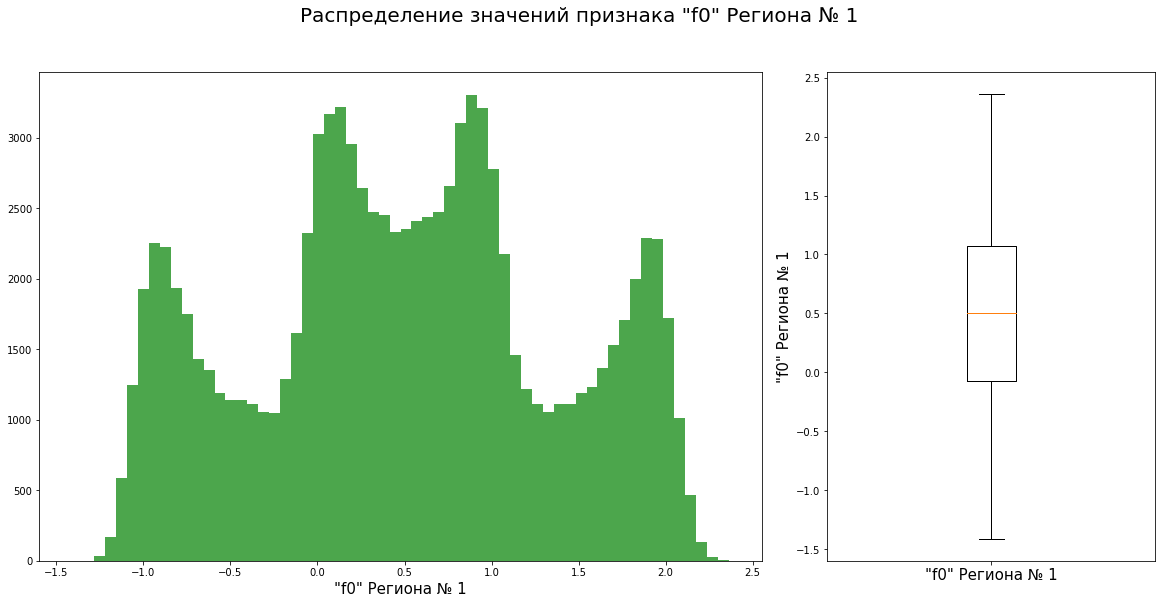

In [17]:
fig, (ax_1, ax_2) = plt.subplots(2, figsize=(20, 9))

fig.suptitle('Распределение значений признака "f0" Региона № 1', fontsize=20)

ax_1 = plt.subplot2grid((3, 3), (0, 0), colspan=2, rowspan=3)
ax_2 = plt.subplot2grid((3, 3), (0, 2), rowspan=3)

ax_1.hist(region_1['f0'], 60, facecolor='g', alpha=0.7)
ax_2.boxplot(region_1['f0'])

plt.xticks([1], ['"f0" Региона № 1'], fontsize=15)

ax_1.set_xlabel('"f0" Региона № 1', fontsize=15)
ax_2.set_ylabel('"f0" Региона № 1', fontsize=15)

plt.show()

Распределение значение столбца `f0` Региона № 1 имеет несколько пиков, также обращает на себя внимание компактность распределения и отсутствие выбросов. Обратимся к следующему столбцу первого региона.

In [18]:
region_1['f1'].describe()

count    100000.000000
mean          0.250143
std           0.504433
min          -0.848218
25%          -0.200881
50%           0.250252
75%           0.700646
max           1.343769
Name: f1, dtype: float64

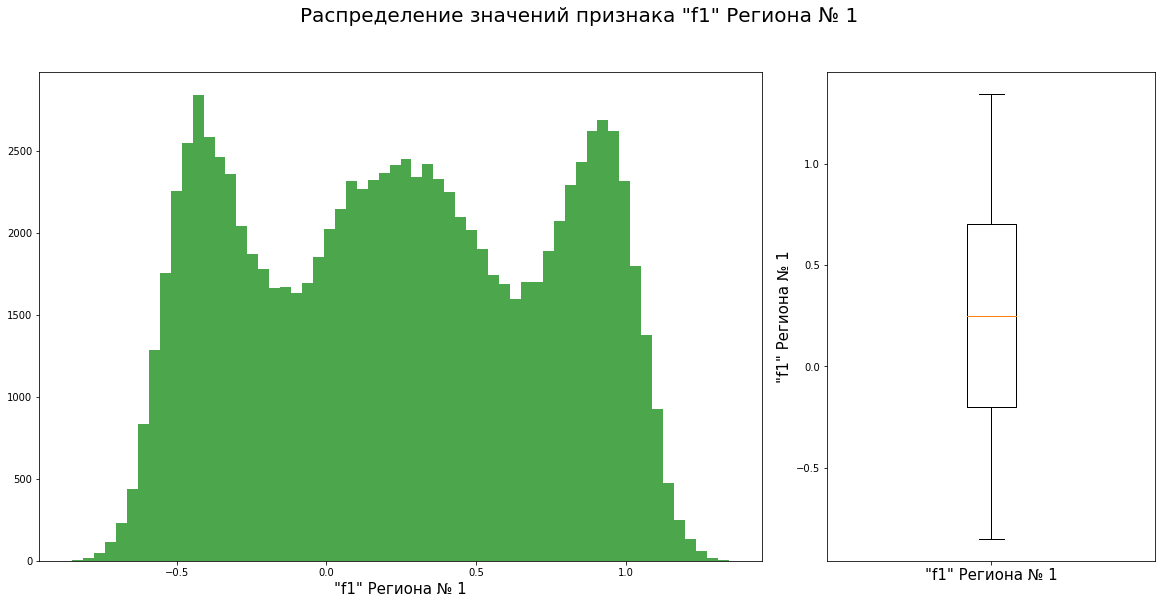

In [19]:
fig, (ax_1, ax_2) = plt.subplots(2, figsize=(20, 9))

fig.suptitle('Распределение значений признака "f1" Региона № 1', fontsize=20)

ax_1 = plt.subplot2grid((3, 3), (0, 0), colspan=2, rowspan=3)
ax_2 = plt.subplot2grid((3, 3), (0, 2), rowspan=3)

ax_1.hist(region_1['f1'], 60, facecolor='g', alpha=0.7)
ax_2.boxplot(region_1['f1'])

plt.xticks([1], ['"f1" Региона № 1'], fontsize=15)

ax_1.set_xlabel('"f1" Региона № 1', fontsize=15)
ax_2.set_ylabel('"f1" Региона № 1', fontsize=15)

plt.show()

Так же наблюдается выраженные пики в распределении значений данных. Далее последний столбец региона.

In [20]:
region_1['f2'].describe()

count    100000.000000
mean          2.502647
std           3.248248
min         -12.088328
25%           0.287748
50%           2.515969
75%           4.715088
max          16.003790
Name: f2, dtype: float64

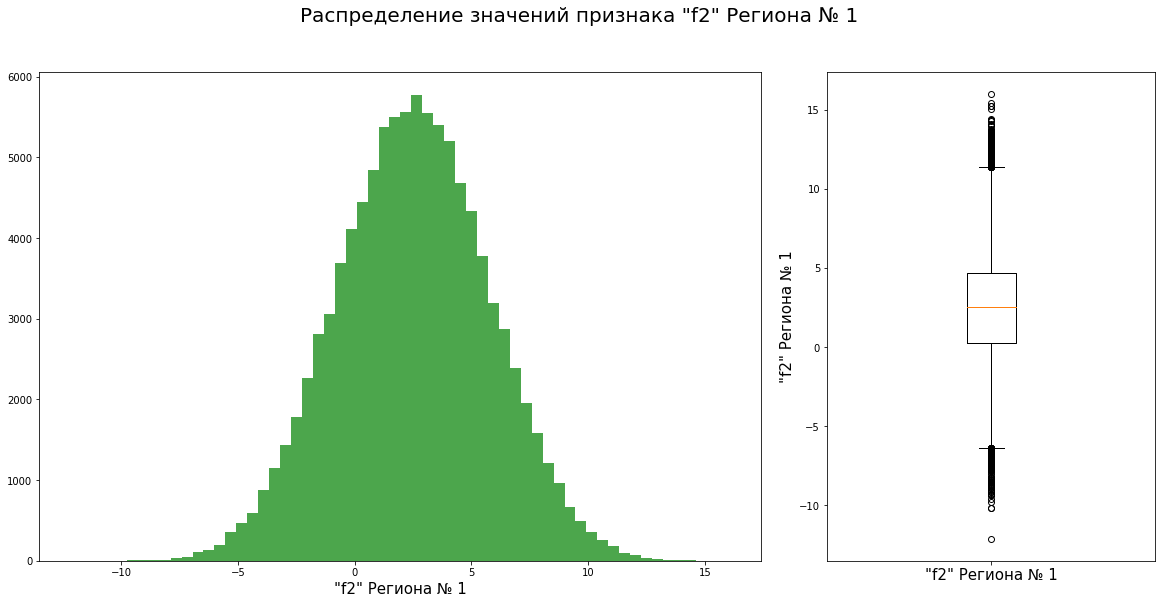

In [21]:
fig, (ax_1, ax_2) = plt.subplots(2, figsize=(20, 9))

fig.suptitle('Распределение значений признака "f2" Региона № 1', fontsize=20)

ax_1 = plt.subplot2grid((3, 3), (0, 0), colspan=2, rowspan=3)
ax_2 = plt.subplot2grid((3, 3), (0, 2), rowspan=3)

ax_1.hist(region_1['f2'], 60, facecolor='g', alpha=0.7)
ax_2.boxplot(region_1['f2'])

plt.xticks([1], ['"f2" Региона № 1'], fontsize=15)

ax_1.set_xlabel('"f2" Региона № 1', fontsize=15)
ax_2.set_ylabel('"f2" Региона № 1', fontsize=15)

plt.show()

Вот и нормальное распределение значений признака, наблюдаем больший размах данных и выбросы. О природе признаков мы не имеем представления, потому не стоить прибегать к удалению выбросов. Перейдем к анализу признаков региона № 2.

In [22]:
region_2['f0'].describe()

count    100000.000000
mean          1.141296
std           8.965932
min         -31.609576
25%          -6.298551
50%           1.153055
75%           8.621015
max          29.421755
Name: f0, dtype: float64

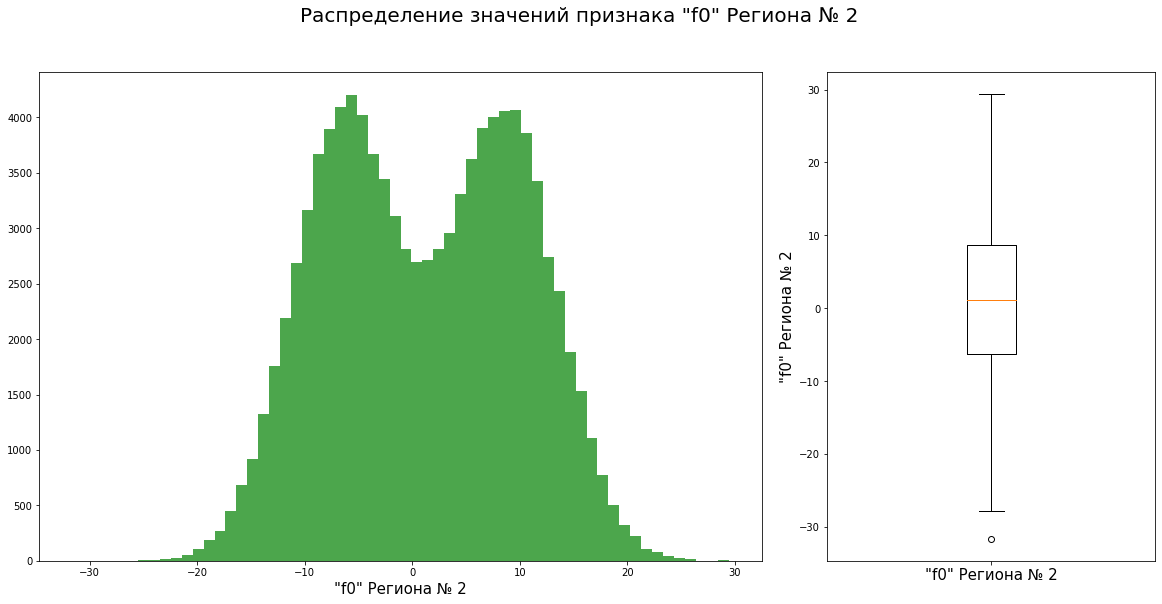

In [23]:
fig, (ax_1, ax_2) = plt.subplots(2, figsize=(20, 9))

fig.suptitle('Распределение значений признака "f0" Региона № 2', fontsize=20)

ax_1 = plt.subplot2grid((3, 3), (0, 0), colspan=2, rowspan=3)
ax_2 = plt.subplot2grid((3, 3), (0, 2), rowspan=3)

ax_1.hist(region_2['f0'], 60, facecolor='g', alpha=0.7)
ax_2.boxplot(region_2['f0'])

plt.xticks([1], ['"f0" Региона № 2'], fontsize=15)

ax_1.set_xlabel('"f0" Региона № 2', fontsize=15)
ax_2.set_ylabel('"f0" Региона № 2', fontsize=15)

plt.show()

Мы видим два пика в распределении признака f0 второго региона, достаточно большая амплитуда значений. 

In [24]:
region_2['f1'].describe()

count    100000.000000
mean         -4.796579
std           5.119872
min         -26.358598
25%          -8.267985
50%          -4.813172
75%          -1.332816
max          18.734063
Name: f1, dtype: float64

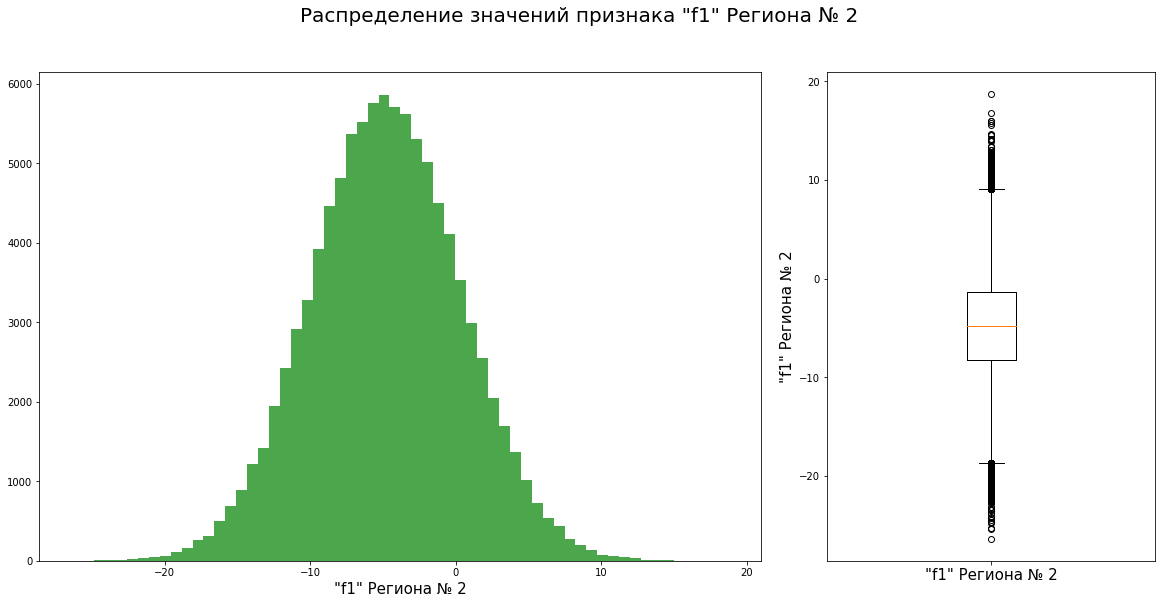

In [25]:
fig, (ax_1, ax_2) = plt.subplots(2, figsize=(20, 9))

fig.suptitle('Распределение значений признака "f1" Региона № 2', fontsize=20)

ax_1 = plt.subplot2grid((3, 3), (0, 0), colspan=2, rowspan=3)
ax_2 = plt.subplot2grid((3, 3), (0, 2), rowspan=3)

ax_1.hist(region_2['f1'], 60, facecolor='g', alpha=0.7)
ax_2.boxplot(region_2['f1'])

plt.xticks([1], ['"f1" Региона № 2'], fontsize=15)

ax_1.set_xlabel('"f1" Региона № 2', fontsize=15)
ax_2.set_ylabel('"f1" Региона № 2', fontsize=15)

plt.show()

Признак f1 второго региона распределен нормально, наблюдаются выбросы. 

In [26]:
region_1['f2'].describe()

count    100000.000000
mean          2.502647
std           3.248248
min         -12.088328
25%           0.287748
50%           2.515969
75%           4.715088
max          16.003790
Name: f2, dtype: float64

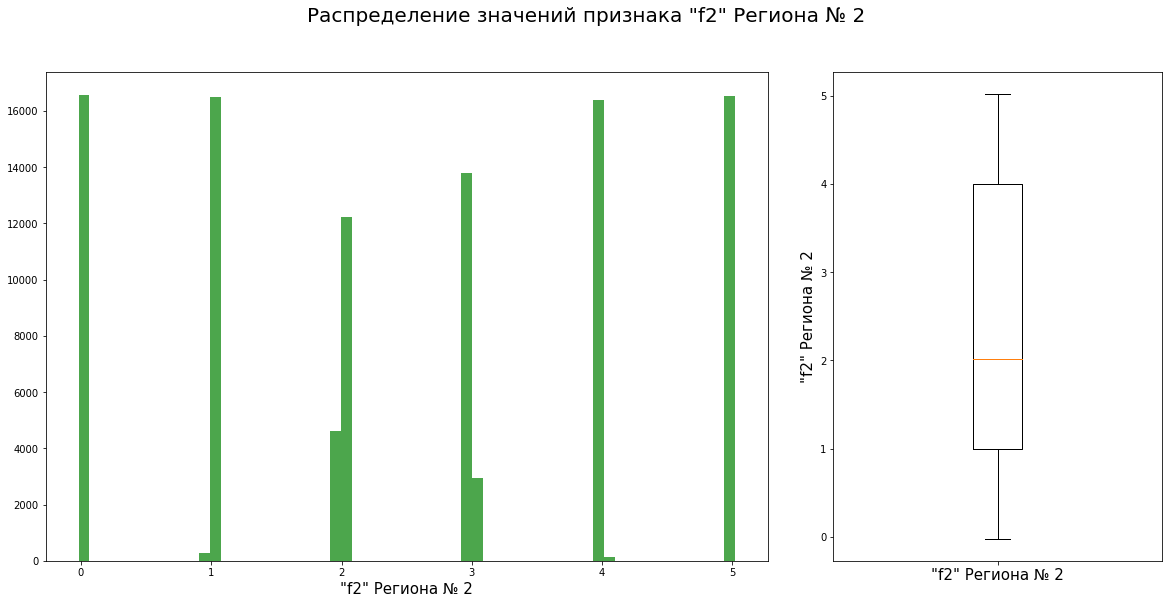

In [27]:
fig, (ax_1, ax_2) = plt.subplots(2, figsize=(20, 9))

fig.suptitle('Распределение значений признака "f2" Региона № 2', fontsize=20)

ax_1 = plt.subplot2grid((3, 3), (0, 0), colspan=2, rowspan=3)
ax_2 = plt.subplot2grid((3, 3), (0, 2), rowspan=3)

ax_1.hist(region_2['f2'], 60, facecolor='g', alpha=0.7)
ax_2.boxplot(region_2['f2'])

plt.xticks([1], ['"f2" Региона № 2'], fontsize=15)

ax_1.set_xlabel('"f2" Региона № 2', fontsize=15)
ax_2.set_ylabel('"f2" Региона № 2', fontsize=15)

plt.show()

Признак f2 региона № 2 распределен категорично, показатель имеет ограниченный набор значений. Рассморим распределение признаков в третьем регионе.

In [28]:
region_3['f0'].describe()

count    100000.000000
mean          0.002023
std           1.732045
min          -8.760004
25%          -1.162288
50%           0.009424
75%           1.158535
max           7.238262
Name: f0, dtype: float64

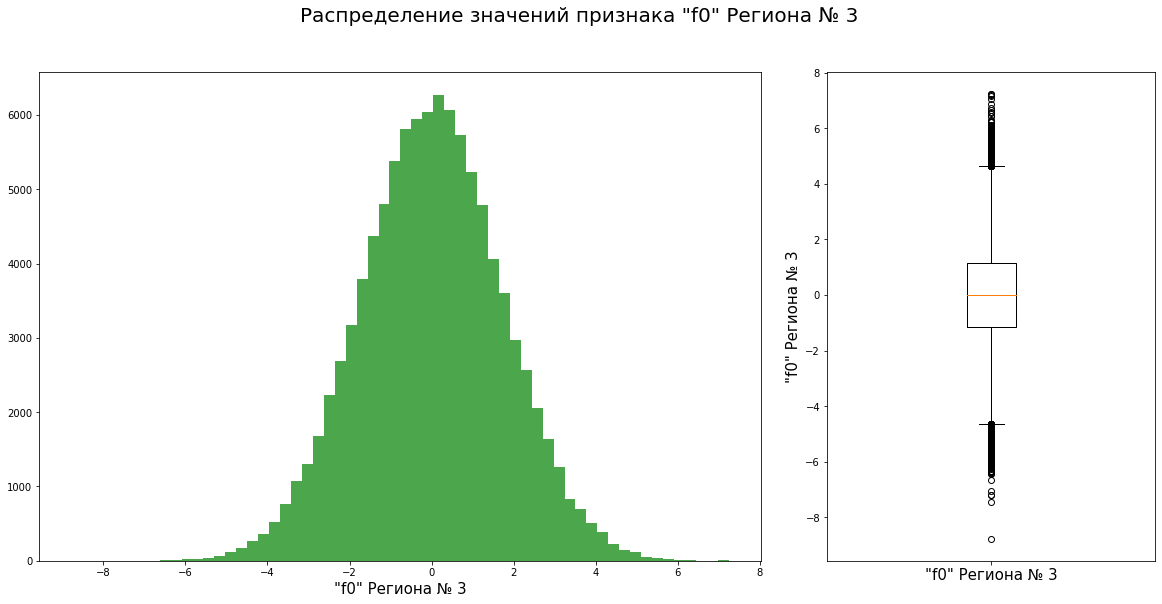

In [29]:
fig, (ax_1, ax_2) = plt.subplots(2, figsize=(20, 9))

fig.suptitle('Распределение значений признака "f0" Региона № 3', fontsize=20)

ax_1 = plt.subplot2grid((3, 3), (0, 0), colspan=2, rowspan=3)
ax_2 = plt.subplot2grid((3, 3), (0, 2), rowspan=3)

ax_1.hist(region_3['f0'], 60, facecolor='g', alpha=0.7)
ax_2.boxplot(region_3['f0'])

plt.xticks([1], ['"f0" Региона № 3'], fontsize=15)

ax_1.set_xlabel('"f0" Региона № 3', fontsize=15)
ax_2.set_ylabel('"f0" Региона № 3', fontsize=15)

plt.show()

In [30]:
region_3['f1'].describe()

count    100000.000000
mean         -0.002081
std           1.730417
min          -7.084020
25%          -1.174820
50%          -0.009482
75%           1.163678
max           7.844801
Name: f1, dtype: float64

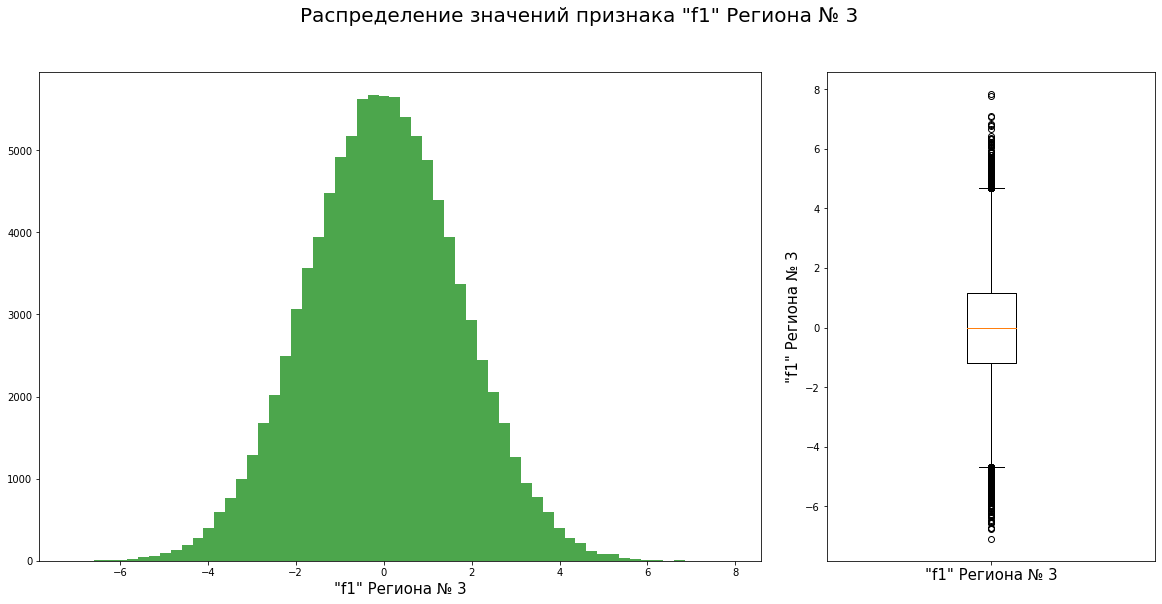

In [31]:
fig, (ax_1, ax_2) = plt.subplots(2, figsize=(20, 9))

fig.suptitle('Распределение значений признака "f1" Региона № 3', fontsize=20)

ax_1 = plt.subplot2grid((3, 3), (0, 0), colspan=2, rowspan=3)
ax_2 = plt.subplot2grid((3, 3), (0, 2), rowspan=3)

ax_1.hist(region_3['f1'], 60, facecolor='g', alpha=0.7)
ax_2.boxplot(region_3['f1'])

plt.xticks([1], ['"f1" Региона № 3'], fontsize=15)

ax_1.set_xlabel('"f1" Региона № 3', fontsize=15)
ax_2.set_ylabel('"f1" Региона № 3', fontsize=15)

plt.show()

In [32]:
region_3['f2'].describe()

count    100000.000000
mean          2.495128
std           3.473445
min         -11.970335
25%           0.130359
50%           2.484236
75%           4.858794
max          16.739402
Name: f2, dtype: float64

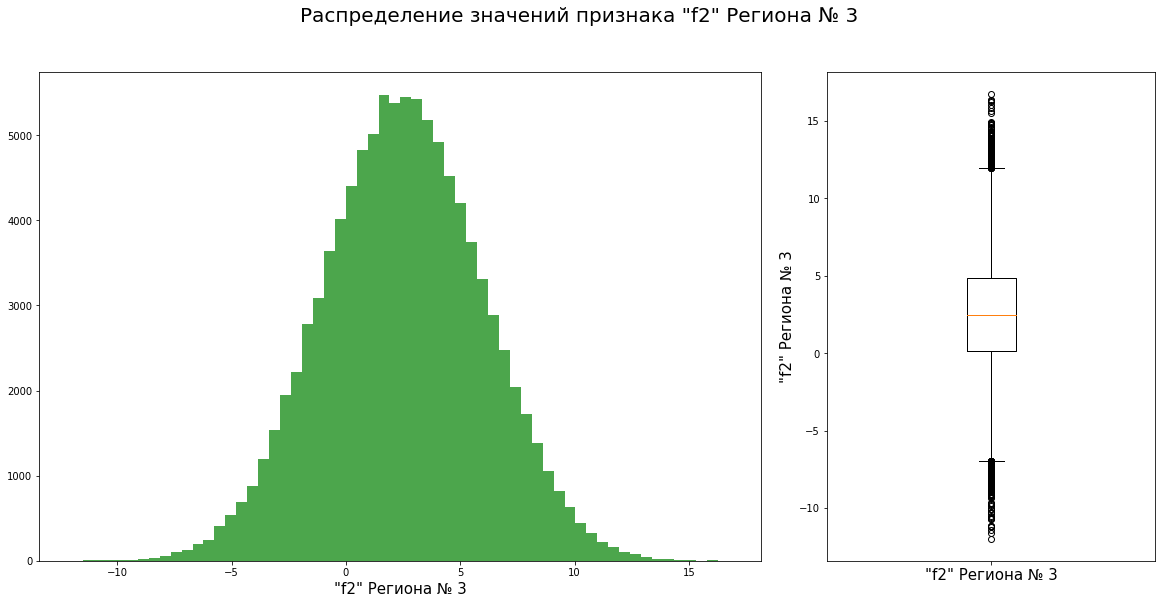

In [33]:
fig, (ax_1, ax_2) = plt.subplots(2, figsize=(20, 9))

fig.suptitle('Распределение значений признака "f2" Региона № 3', fontsize=20)

ax_1 = plt.subplot2grid((3, 3), (0, 0), colspan=2, rowspan=3)
ax_2 = plt.subplot2grid((3, 3), (0, 2), rowspan=3)

ax_1.hist(region_3['f2'], 60, facecolor='g', alpha=0.7)
ax_2.boxplot(region_3['f2'])

plt.xticks([1], ['"f2" Региона № 3'], fontsize=15)

ax_1.set_xlabel('"f2" Региона № 3', fontsize=15)
ax_2.set_ylabel('"f2" Региона № 3', fontsize=15)

plt.show()

Распределение всех признаков в третьем регионе носит нормальный характер, амплитуда значений признаков вполне сравнима, наблюдаются выбросы в значениях в каждом признаке.

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены и осмотрены корректно. Согласен, что колонка id нам не нужна.
    
Радует, что распределения были визуализированы!
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Долго думал над выбросами, но все же решил оставить. Это было корректно, учитывая условность признаков? В других случаях лучше избавляться от них? Ниже я использовал для оценки доверительного интервала, как ты отметил, квантили, те же квантили будут хорошим методом для удаления выбросов?
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Нет, лучше не удалять. Аномалии можно удалять только в случае, если удается доказать, что это ошибки.
</div>

Распределения и разброс данных в датасетах неоднородный, так же, как и наборы распределений признаков для каждого в отдельности региона, что обещает нам разницу в показаниях метрики RMSE линейной регрессии по каждому региону.

Далее разделим наши таблицы на обучающие и валидационные выборки, в соотношении 0.75:0.25 соответственно.

In [34]:
train_region_1, valid_region_1 = train_test_split(region_1, test_size=0.25, random_state=12345)
train_region_2, valid_region_2 = train_test_split(region_2, test_size=0.25, random_state=12345)
train_region_3, valid_region_3 = train_test_split(region_3, test_size=0.25, random_state=12345)

In [35]:
print(
    f'Доля строк в обучающей выборке Регион № 1: {len(train_region_1) / len(region_1):.2f} \
    \nДоля строк в валидационной выборке Регион № 1: {len(valid_region_1) / len(region_1):.2f} \
    \n\nДоля строк в обучающей выборке Регион № 2: {len(train_region_2) / len(region_2):.2f} \
    \nДоля строк в валидационной выборке Регион № 2: {len(valid_region_2) / len(region_2):.2f} \
    \n\nДоля строк в обучающей выборке Регион № 3: {len(train_region_3) / len(region_3):.2f} \
    \nДоля строк в валидационной выборке Регион № 3: {len(valid_region_3) / len(region_3):.2f}'
)

Доля строк в обучающей выборке Регион № 1: 0.75     
Доля строк в валидационной выборке Регион № 1: 0.25     

Доля строк в обучающей выборке Регион № 2: 0.75     
Доля строк в валидационной выборке Регион № 2: 0.25     

Доля строк в обучающей выборке Регион № 3: 0.75     
Доля строк в валидационной выборке Регион № 3: 0.25


Далее выделим целевой признак для получившихся выборок.

In [36]:
# Созадем выборки для Региона № 1

target_train_r1 = train_region_1['product']
features_train_r1 = train_region_1.drop('product', axis=1)

target_valid_r1 = valid_region_1['product']
features_valid_r1 = valid_region_1.drop('product', axis=1)

# Созадем выборки для Региона № 2

target_train_r2 = train_region_2['product']
features_train_r2 = train_region_2.drop('product', axis=1)

target_valid_r2 = valid_region_2['product']
features_valid_r2 = valid_region_2.drop('product', axis=1)

# Созадем выборки для Региона № 3

target_train_r3 = train_region_3['product']
features_train_r3 = train_region_3.drop('product', axis=1)

target_valid_r3 = valid_region_3['product']
features_valid_r3 = valid_region_3.drop('product', axis=1)

Поскольку признаки имеют разный масштаб с помощью класса **StandardScaler()** приведем преобразование до единого масштаба признаков.

In [37]:
numeric = ['f0', 'f1', 'f2']

scaler = StandardScaler()
scaler.fit(features_train_r1[numeric])

features_train_r1[numeric] = scaler.transform(features_train_r1[numeric])
features_valid_r1[numeric] = scaler.transform(features_valid_r1[numeric])

features_train_r2[numeric] = scaler.transform(features_train_r2[numeric])
features_valid_r2[numeric] = scaler.transform(features_valid_r2[numeric])

features_train_r3[numeric] = scaler.transform(features_train_r3[numeric])
features_valid_r3[numeric] = scaler.transform(features_valid_r3[numeric])

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что scaler был обучен только на треине!
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Сделал масштабирование, но на практике без него результаты те же. Это тоже частный случай? Для регрессивных моделей лучше всегда делать масштабирование? 
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Для линейных моделей лучше делать всегда. Это может помочь в случае, если распределение немного изменится.
</div>

## Обучение и проверка модели для каждого региона

В условиях задачи сказано, что при разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки. Смоделируем данный принцип в рамках работы модели. При предсказании выберем из валидационной выборке 500 случайных значений, сделаем по ним прогноз.

Проведем обучение модели линейной регрессии по каждому региону, оценим предсказания метрикой RMSE. Регион № 1:

In [38]:
model_1 = LinearRegression()
model_1.fit(features_train_r1, target_train_r1)

sample_features_valid_r1 = features_valid_r1.sample(n=500, replace=False, random_state=12345)
sample_target_valid_r1 = target_valid_r1[sample_features_valid_r1.index]

predictions_region_1 = model_1.predict(sample_features_valid_r1)


result = (mean_squared_error(sample_target_valid_r1, predictions_region_1))**0.5 

print('RMSE модели линейной регрессии на валидационной выборке Регион №2:', result, 
     '\nСредний предсказанный запас сырья в скважине:', predictions_region_1.mean())

RMSE модели линейной регрессии на валидационной выборке Регион №2: 37.57514952112267 
Средний предсказанный запас сырья в скважине: 92.92815460984569


Модель линейной регрессии на данных второго региона:

In [39]:
model_2 = LinearRegression()
model_2.fit(features_train_r2, target_train_r2)

sample_features_valid_r2 = features_valid_r2.sample(n=500, replace=False, random_state=12345)
sample_target_valid_r2 = target_valid_r2[sample_features_valid_r2.index]

predictions_region_2 = model_2.predict(sample_features_valid_r2)


result = (mean_squared_error(sample_target_valid_r2, predictions_region_2))**0.5 

print('RMSE модели линейной регрессии на валидационной выборке Регион №2:', result, 
     '\nСредний предсказанный запас сырья в скважине:', predictions_region_2.mean())

RMSE модели линейной регрессии на валидационной выборке Регион №2: 0.9018493264281595 
Средний предсказанный запас сырья в скважине: 71.83821266831441


И работа модели на данных по третьему региону: 

In [40]:
model_3 = LinearRegression()
model_3.fit(features_train_r3, target_train_r3)

sample_features_valid_r3 = features_valid_r3.sample(n=500, replace=False, random_state=12345)
sample_target_valid_r3 = target_valid_r3[sample_features_valid_r3.index]

predictions_region_3 = model_3.predict(sample_features_valid_r3)


result = (mean_squared_error(sample_target_valid_r3, predictions_region_3))**0.5 

print('RMSE модели линейной регрессии на валидационной выборке Регион №2:', result, 
     '\nСредний предсказанный запас сырья в скважине:', predictions_region_3.mean())

RMSE модели линейной регрессии на валидационной выборке Регион №2: 40.608296869780055 
Средний предсказанный запас сырья в скважине: 94.73109592789761


Как мы видим из показателя метрики RMSE, модель на данных о первом и третьем региона показала очень похожий результат, и его сложно оценить как отличный. Довольно большая ошибка в предсказаниях.
А вот для второго региона модель показала очень точную оценку, но для нас это не может быть сюрпризом, выраженность тенденций в данный прямо пропорционально влияет на точность прогноза модели. При этом стоит отметить самый низкий показатель средних запасов во втором регионе, это может оказаться ключевым фактором, даже при верном определении наиболее богатых сырьем скважин из случайной выборке в 500 наблюдений. Сохраним в переменных модели для каждого региона.

## Ключевые параметры для расчета прибыли 

Определим ключевые параметры для расчета экономических показателей рентабельности, что будет определять конечный выбор выгоднейшего региона для промышленной добычи нефти.

In [41]:
# бюджет на разработку скважин в регионе составляет 10 млрд рублей
DEVELOP_BUDGET = 10000000000

# стоимость одной тысячи баррелей составляет 450 000 рублей (именно в тыс баррелей измеряется целевой признак)
BARRELS_PRICE = 450000

# 200 скважин в итоге будут разработы
NUMDER_WELLS = 200

print('Себестоимость одной скважины:', DEVELOP_BUDGET / BARRELS_PRICE / NUMDER_WELLS)

Себестоимость одной скважины: 111.11111111111111


Исходя из расчетов, месторождение с запасом сырья от 111.11 тыс. баррелей будет считаться доходным. 

Рассмотрим гипотетическую прибыль на действительной средней скважине из каждого региона и сравним с показателем себестоимости. 

In [42]:
print(
    'Средний показатель объема запасов на одной скважине Регион № 1:', region_1['product'].mean(),
    '\nСредний показатель объема запасов на одной скважине Регион № 2:', region_2['product'].mean(),
    '\nСредний показатель объема запасов на одной скважине Регион № 3:', region_3['product'].mean()
     )

Средний показатель объема запасов на одной скважине Регион № 1: 92.50000000000001 
Средний показатель объема запасов на одной скважине Регион № 2: 68.82500000000002 
Средний показатель объема запасов на одной скважине Регион № 3: 95.00000000000004


Любопытно, что ни один регион не обладаем средним запасом сырья на одно месторождение достаточным для выгодной разработки. Средняя скважина убыточна на каждом регионе, потому здесь не стоит полагаться на случай, свою ценность должно показать машинное обучение и предсказание ее алгоритмов. Очень интересно, смогут ли модели дать лучший результат и выделить 200 лучших из выборки в 500 скважин достаточных для фиксирования общей прибыли. Особенно интересен, сможет ли точнейшее предсказание модели линейной регрессии "вытянуть" второй регион, если не в лидеры, то хотя бы в зону рентабельности. Это узнаем из следующего этапа исследования.

<div class="alert alert-block alert-info">

<b>Совет: </b> В названиях константных переменных лучше использовать только БОЛЬШИЕ буквы. Это соглашение между программистами: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html#id29 .
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Точка безубыточности найдена верно, сравнение проведено!
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения: поправил регистр констант, спасибо, очень полезная ссылка!
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Спасибо!
</div>

## Оценка действительной прибыли 

Создадим функцию, которая примет в себя целевые показатели реального запаса сырья и предсказания модели по ним. Создаст единый датафрейм, отсортирует по убыванию показателя предсказанной прибыли, и по двумстам лучшим скважинам предсказанным моделью посчитает уже действительную прибыль или, если говорить экономическими терминами, валовую прибыль.

Далее в этой же ячейке посчитаем валовую прибыль для каждого региона по лучшим предсказаниям.

In [43]:
def company_profit(target, predictions):
    df = pd.DataFrame({'col1': target, 'col2': predictions})
    df = df.sort_values(by=['col2'], ascending=False)[:200]
    return sum(df['col1']) * BARRELS_PRICE - DEVELOP_BUDGET

print(
    'Валовая прибыль по выбранным моделью скважинам Регион № 1:', company_profit(sample_target_valid_r1, predictions_region_1),
    '\nВаловая прибыль по выбранным моделью скважинам Регион № 2:', company_profit(sample_target_valid_r2, predictions_region_2),
    '\nВаловая прибыль по выбранным моделью скважинам Регион № 3:', company_profit(sample_target_valid_r3, predictions_region_3)
     )

Валовая прибыль по выбранным моделью скважинам Регион № 1: 679068857.8924236 
Валовая прибыль по выбранным моделью скважинам Регион № 2: 779479884.1768398 
Валовая прибыль по выбранным моделью скважинам Регион № 3: 439990143.0221844


В результате второй регион благодаря работе модели и собственным признакам для нее удобным показал лучший результат по показателям прибыли. А вот самый богатый регион с точки зрения среднего запаса на одну скважину, регион № 3, показал самый скромный результат, исходя из распределения своих признаков, близкому к случайному. Первый регион, отнюдь не бедный, показал неплохой результат, но не лучший. Определяющим факторов в данном случае стала работа модели и ее любовь к разного рода закономерностям в данных.

## Оценка рисков и прибыли техникой Bootstrap

Применим технику "Bootstrap" для отражения распределения прибыли по каждому региону. Найдет 95%-ный доверительный интервал, вычислим среднее значение прибыли, оценим риск убытков на выборках скважин для определения оптимального региона для разработки нефтяных месторождений. Создадим функцию для расчета прибыли для каждой выборке сформированной циклом "Bootstrap". На вход функция принимает собственно выборку и модель, в теле функции мы ссылаемся на функцию для расчета прибыли `company_profit`.

In [44]:
def profit_function(sample, model):
    target = sample['product']
    features = sample.drop('product', axis=1)
    predictions = model.predict(features)
    return company_profit(target, predictions)
    

Используем технику на первом регионе.

In [51]:
state = RandomState(12345) 

bootstrap_samples = 1000

total_profit = []

for i in range(bootstrap_samples):
    sample = region_1.sample(n=500, replace=False, random_state=state)
    total_profit.append(profit_function(sample, model_1))
        
total_profit = pd.Series(total_profit)

print('Средняя валовая прибыль по Региону №1:', sum(total_profit) / len(total_profit),
      '\n95%-ый доверительный интервал средней прибыли имеет значения от:', 
      total_profit.quantile(0.025), 'и до:', total_profit.quantile(0.975),
      '\nВероятность убытков для Региона № 1 (%):', (total_profit < 0).mean() * 100
     )

Средняя валовая прибыль по Региону №1: 334895699.16134804 
95%-ый доверительный интервал средней прибыли имеет значения от: -163146990.84931007 и до: 829370063.034725 
Вероятность убытков для Региона № 1 (%): 11.899999999999999


<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что для подсчета доверительного интервала использовался именно метод квантилей!
</div>


<div class="alert alert-block alert-info">

<b>Совет: </b> Риск можно было найти чуть проще: `(values < 0).mean()`, если объект типа pandas Series или numpy array.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения: поправил. Спасибо за совет! Элегантное решение. Очень ловко удалось оптимизировать код.
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> ОК.
</div>

Распределение выборок показала нам рискованный характер региона № 1. 95%-ный доверительный интервал уже затрагивает отрицательные значения прибыли, а более 10% выборок показали убыток. Перейдем ко второму региону.

In [52]:
bootstrap_samples = 1000

total_profit = []

count = 0

for i in range(bootstrap_samples):
    sample = region_2.sample(n=500, replace=False, random_state=state)
    total_profit.append(profit_function(sample, model_2))

        
total_profit = pd.Series(total_profit)

print('Средняя валовая прибыль по Региону №2:', sum(total_profit) / len(total_profit),
      '\n95%-ый доверительный интервал средней прибыли имеет значения от:', 
      total_profit.quantile(0.025), 'и до:', total_profit.quantile(0.975),
      '\nВероятность убытков для Региона № 2 (%):',(total_profit < 0).mean() * 100
     )

Средняя валовая прибыль по Региону №2: 455805014.43072444 
95%-ый доверительный интервал средней прибыли имеет значения от: 62972016.20043713 и до: 856669877.1156306 
Вероятность убытков для Региона № 2 (%): 1.0


Показатели второго региона заметно лучше, доверительный интервал отражает только положительные значениях прибыли. А вероятность убытков всего 1.6%. Проведем исследования и на третьем регионе.

In [53]:
bootstrap_samples = 1000

total_profit = []

count = 0

for i in range(bootstrap_samples):
    sample = region_3.sample(n=500, replace=False, random_state=state)
    total_profit.append(profit_function(sample, model_3))
        

total_profit = pd.Series(total_profit)

print('Средняя валовая прибыль по Региону №3:', sum(total_profit) / len(total_profit),
      '\n95%-ый доверительный интервал средней прибыли имеет значения от:', 
      total_profit.quantile(0.025), 'и до:', total_profit.quantile(0.975),
      '\nВероятность убытков для Региона № 3 (%):', (total_profit < 0).mean() * 100
     )

Средняя валовая прибыль по Региону №3: 355639246.4442948 
95%-ый доверительный интервал средней прибыли имеет значения от: -167110258.32265174 и до: 871803636.3655331 
Вероятность убытков для Региона № 3 (%): 10.6


Третий регион оказался более привлекательным, чем первый, но до показателей второго ему далеко.

<div class="alert alert-block alert-success">
<b>Успех:</b> Все статистики посчитаны корректно, молодец!
</div>

## Вывод

Исходя из проведенного исследования и показателях, которые нам продемонстрировала модель линейной регрессии, наиболее предпочтилельным регион для разработки стоит считать Регион № 2. 

Техника Bootstrap показала нам преимущества данного региона, самая высокая средняя прибыли на выборках, низкие риски убытков, положительные значения на всех протяженности 95% доверительного интервала.

Исходя из общих предварительных расчетов, второй регион выглядел мало пригодным для разработки, но его признаки оказались удобными для алгоритма линейной регрессии, выборки скважин региона хорошо прогнозируемы, отсюда высокий результат в их сортировке и расчета запасов сырья в месторождении. 

Все это сделало выбор в пользу второго региона очевидным.

<div class="alert alert-block alert-success">
<b>Успех:</b> Приятно видеть вывод в конце проекта!
</div>